# Tutorial
- Train / test on Monk datasets
    - SGD
    - BFGS
    - L-BFGS

- Train / test on ML-Cup dataset
    - SGD
    - BFGS
    - L-BFGS

- Perform grid search
    - SGD
    - BFGS
    - L-BFGS
- Save and load network parametes

In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *

# Monk 1,2,3 with SGD, BFGS and L-BFGS

### Load  Monk dataset

In [2]:
# choose monk dataset
monk = str(1)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
train_patterns, test_patterns = decode_patterns(encoding, features, train_data, test_data)
train_labels, test_labels = transform_labels(train_data, test_data)

# SGD

### SGD - define network and parameters

In [3]:
# define architecture and hyperparameters
architecture = [17, 20, 10, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
network = Network(architecture, neurons)
loss_object = SquaredError("tangentH")
learning_rate = 0.1
momentum = 0.95
regularization = 0.0
batch_size = len(train_patterns)
epsilon = 1e-5
epochs = 7000

### SGD - train

In [4]:
tic = time()
# 5. train
loss_tr_sgd, misclass_train, \
loss_ts_sgd, misclass_test, norm_gradients_sgd = network.train_SGD(x_train=train_patterns, 
                                         y_train=train_labels, 
                                         x_test=test_patterns,
                                         y_test=test_labels,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=regularization,
                                        epsilon=epsilon)
toc = time()

### SGD - learning curves

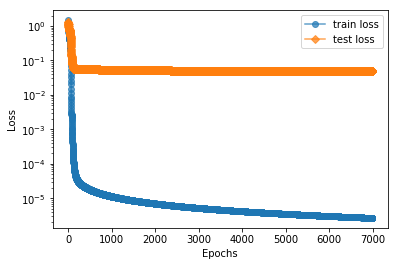

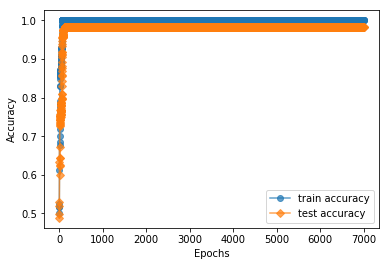

accuracy train: 1.0
accuracy test: 0.981481481481
error train: 2.6950294163e-06
error test: 0.0482191506099
time: 1649.80105495
norm gradient last: 1.26293836065e-05


In [5]:
plot_train_test_learning_curve(loss_ts_sgd, loss_tr_sgd, misclass_test, misclass_train)
print "accuracy train:", 1 - misclass_train[-1]
print "accuracy test:", 1 - misclass_test[-1]
print "error train:", loss_tr_sgd[-1]
print "error test:", loss_ts_sgd[-1]
print "time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]

# BFGS

### BFGS - define network and parameters

In [8]:
architecture = [17, 20, 10, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-4
c_2 = 0.7
theta = 0.7
lambda_ = 0#5 * 1e-2
epsilon = 1e-5
epochs = 2000

network = Network(architecture, neurons)

### BFGS - train

In [9]:
tic = time()
loss_tr_bfgs, miss_tr, loss_ts_bfgs, miss_ts, \
alphas_bfgs, norm_gradients_bfgs = network.train_BFGS(train_patterns, train_labels, 
                                                       test_patterns, test_labels,
                                                       theta=theta, c_1=c_1, c_2=c_2, 
                                                       lossObject=loss_object, 
                                                       regularization=lambda_, 
                                                       epochs=epochs, epsilon=epsilon)
toc = time()

0 out of 2000
1 out of 2000
2 out of 2000
3 out of 2000
4 out of 2000
5 out of 2000
6 out of 2000
7 out of 2000
8 out of 2000
9 out of 2000
10 out of 2000
11 out of 2000
12 out of 2000
13 out of 2000
14 out of 2000
15 out of 2000
16 out of 2000
17 out of 2000
18 out of 2000
19 out of 2000
20 out of 2000
21 out of 2000
22 out of 2000
23 out of 2000
24 out of 2000
25 out of 2000
26 out of 2000
27 out of 2000
28 out of 2000
29 out of 2000
30 out of 2000
31 out of 2000
32 out of 2000
33 out of 2000
34 out of 2000
35 out of 2000
36 out of 2000
37 out of 2000
38 out of 2000
39 out of 2000
40 out of 2000
41 out of 2000
42 out of 2000
43 out of 2000
44 out of 2000
45 out of 2000
46 out of 2000
47 out of 2000
48 out of 2000
49 out of 2000
50 out of 2000
51 out of 2000
stop: gradient norm, epoch 51


### BFGS - learning curves

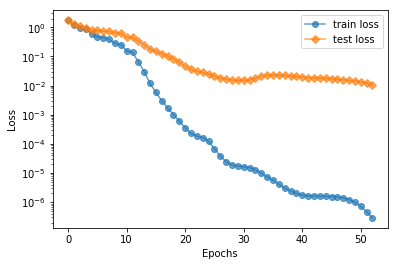

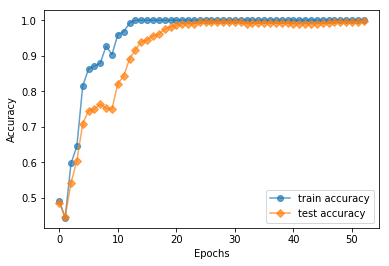

accuracy train: 1.0
accuracy test: 0.997685185185
loss train: 2.88558163053e-07
loss test: 0.0106851675802
training time: 21.4035830498
norm gradient last: 5.82927701208e-06


In [10]:
plot_train_test_learning_curve(loss_ts_bfgs, loss_tr_bfgs, miss_ts, miss_tr)
print "accuracy train:", 1 - miss_tr[-1]
print "accuracy test:", 1 - miss_ts[-1]
print "loss train:", loss_tr_bfgs[-1]
print "loss test:", loss_ts_bfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]

# L-BFGS

### L-BFGS - define network and parameters

In [11]:
architecture = [17, 20, 10, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-4
c_2 = 0.7
theta = 0.7
lambda_ = 0
epsilon = 1e-5
epochs = 100
m = 10

network = Network(architecture, neurons)

### L-BFGS - train

In [12]:
tic = time()
loss_tr_lbfgs, miss_tr, loss_ts_lbfgs, \
miss_ts, alphas_lbfgs, norm_gradients_lbfgs = network.train_LBFGS(train_patterns, train_labels,
                                                        test_patterns, test_labels,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m)
toc = time()

0 out of 100
1 out of 100
2 out of 100
3 out of 100
4 out of 100
5 out of 100
6 out of 100
7 out of 100
8 out of 100
9 out of 100
10 out of 100
11 out of 100
12 out of 100
13 out of 100
14 out of 100
15 out of 100
16 out of 100
17 out of 100
18 out of 100
19 out of 100
20 out of 100
21 out of 100
22 out of 100
23 out of 100
24 out of 100
25 out of 100
26 out of 100
27 out of 100
28 out of 100
29 out of 100
30 out of 100
31 out of 100
32 out of 100
33 out of 100
stop: norm gradient, epoch 33


### L-BFGS - learning curves

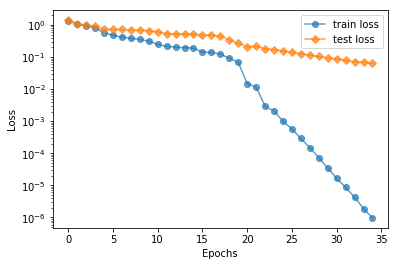

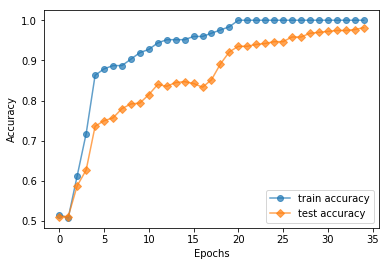

accuracy train: 1.0
accuracy test: 0.981481481481
loss train: 9.67585946137e-07
loss test: 0.0635242112247
training time: 14.7524499893
norm gradient last: 6.71497342596e-06


In [13]:
plot_train_test_learning_curve(loss_ts_lbfgs, loss_tr_lbfgs, miss_ts, miss_tr)
print "accuracy train:", 1 - miss_tr[-1]
print "accuracy test:", 1 - miss_ts[-1]
print "loss train:", loss_tr_lbfgs[-1]
print "loss test:", loss_ts_lbfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]

### Monk - optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)

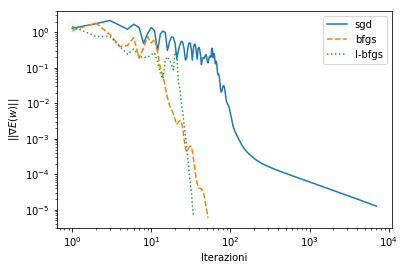

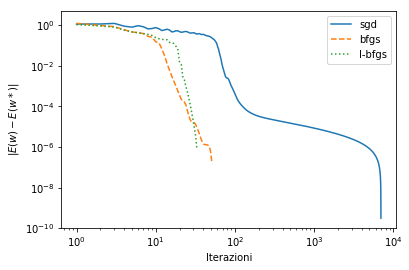

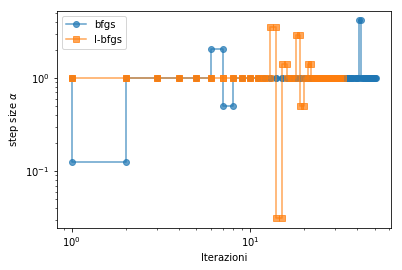

In [14]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)

--------------------------------------
# ML-Cup with SGD, BFGS and L-BFGS

### Load ML-Cup dataset

In [ ]:
# 1. read file train set
df = pd.read_csv("../MLCup/ML-CUP17-TR_shuffled.csv", comment='#')
features_col = ["input1","input2","input3","input4","input5",
                "input6","input7", "input8","input9","input10"]
targets_col = ["target_x", "target_y"]

# 2. divide pattern and targets
patterns,labels = divide_patterns_labels(df,features_col,targets_col)

# 3. divide in development set and test set
X_train, Y_train, X_test, Y_test = holdout_cup(patterns,labels, fraction_tr=0.8)

## SGD - cup

In [ ]:
architecture = [17, 10, 10, 2] #[17, 100, 50, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

learning_rate = 0.2
momentum = 0.9
lambda_ = 0#1 * 1e-3
batch_size = len(X_train)
epsilon = 1e-5
epochs = 3000

network = Network(architecture, neurons)

In [ ]:
tic = time()
# 5. train
loss_tr_sgd, miss_train, \
loss_ts_sgd, miss_test, norm_gradients_sgd = network.train_SGD(x_train=X_train, 
                                         y_train=Y_train, 
                                         x_test=X_test,
                                         y_test=Y_test,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=lambda_, epsilon=epsilon)
toc = time()

In [ ]:
plot_train_test_learning_curve(loss_ts_sgd, loss_tr_sgd, miss_test, miss_train)
print "loss train:", loss_tr_sgd[-1]
print "loss test:", loss_ts_sgd[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]

## BFGS - cup

In [ ]:
architecture = [17, 10, 10, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

c_1 = 1e-3
c_2 = 0.5
theta = 0.9
lambda_ = 0
epsilon = 1 * 1e-5
epochs = 15

In [ ]:
network = Network(architecture, neurons)

tic = time()
loss_tr_bfgs, miss_tr, \
loss_ts_bfgs, miss_ts, alphas_bfgs, norm_gradients_bfgs = network.train_BFGS(X_train, Y_train, 
                                                       X_test, Y_test,
                                                       theta=theta, c_1=c_1, c_2=c_2, 
                                                       lossObject=loss_object, 
                                                       regularization=lambda_, 
                                                       epochs=epochs, epsilon=epsilon)
toc = time()

In [ ]:
plot_train_test_learning_curve(loss_ts_bfgs, loss_tr_bfgs, miss_ts, miss_tr)
print "loss train:", loss_tr_bfgs[-1]
print "loss test:", loss_ts_bfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]

## L-BFGS - cup

In [ ]:
architecture = [17, 10, 10, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

c_1 = 1e-5
c_2 = 0.9
theta = 0.5
lambda_ = 0
epsilon = 1e-5
epochs = 20
m = 10

network = Network(architecture, neurons)

In [ ]:
tic = time()
loss_tr_lbfgs, miss_tr, \
loss_ts_lbfgs, miss_ts, alphas_lbfgs, norm_gradients_lbfgs = network.train_LBFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m)
toc = time()

In [ ]:
plot_train_test_learning_curve(loss_ts_lbfgs, loss_tr_lbfgs, miss_ts, miss_tr)
print "loss train:", loss_tr_lbfgs[-1]
print "loss test:", loss_ts_lbfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]

### ML-CUP - optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)

In [ ]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)

# Grid search

In [ ]:
# directory where to save learning curves
save_directory = './' 
# loss to optimize
loss = SquaredError("tangentH")

In [ ]:
# grid search parameters
grid = GridSearchSGDParams(learning_rate = [0.01, 0.001],
                           momentum = [0.5, 0.9], 
                           batch_size = [16, 32], 
                           architecture = [[17, 10, 1]],
                           neurons = [[InputNeuron, TanHNeuron, TanHNeuron]], 
                           regularization = [0.01, 0.001], 
                           epoch = 5)

# execute grid search
grid_search_SGD(grid, loss, train_patterns, train_labels,
                test_patterns, test_labels, n_trials=1, save_in_dir=save_directory)

In [ ]:
grid = GridSearchBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])         

grid_search_BFGS(grid, loss, train_patterns, train_labels,
                 test_patterns, test_labels, n_trials=2, save_in_dir=save_directory)

In [ ]:
grid = GridSearchLBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            m=[10, 20],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])

grid_search_LBFGS(grid, loss, train_patterns, train_labels,
                  test_patterns, test_labels,
                  n_trials=5, save_in_dir=save_directory)

## Save & load network parameters

In [ ]:
network = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron])   # random initialized
with open("test_weights.csv", "w") as out_file:
    network.dump_weights(out_file)
    
network_2 = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron]) # random initialized
with open("test_weights.csv", "r") as in_file:
    network_2.load_weights(in_file)
    
network.get_weights_as_vector() == network_2.get_weights_as_vector()